In [1]:
import tensorflow as tf
from copy import  deepcopy
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import random
import datetime

C:\Tools\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

In [3]:
from model_deep import Model

In [4]:
def mnist_imshow(img):
    plt.imshow(img.reshape([28, 28]), cmap='gray')
    plt.axis('off')

# return a new mnist dataset w/ pixels randomly permuted
def permute_mnist(mnist):
    perm_inds = list(range(mnist.train.images.shape[1]))
#     print (range(mnist.train.images.shape[1]))
    np.random.shuffle(perm_inds)
    mnist2 = deepcopy(mnist)
    sets = ["train", "validation", "test"]
    for set_name in sets:
        this_set = getattr(mnist2, set_name) # shallow copy
#         print (np.array([this_set.images[:,i] for i in [1,2,3,4]]).shape)
        #dafaq is with ._images, where did this shit come from, but okay moving on with lyf 
        this_set._images = np.transpose(np.array([this_set.images[:,c] for c in perm_inds]))
    return mnist2

In [5]:
def train_model(model, train_set, test_sets, num_iters):
    test_accs = np.zeros(len(test_sets))
    
    for idx in range(num_iters):
        
        train_batch = train_set.train.next_batch(100)
        feed_dict = {model.x: train_batch[0], model.labels: train_batch[1]}
        model.train_step.run(feed_dict=feed_dict)
        
    for t, test_set in enumerate(test_sets):
        feed_dict = {model.x: test_set.test.images, model.labels:test_set.test.labels}
        accuracy = model.accuracy.eval(feed_dict=feed_dict)
        test_accs[t] = accuracy
    print(f'\rTraining  {num_iters}/{num_iters} done.')
    return test_accs

In [6]:
def calc_accs(params_list, data_sets, iters_per_dataset, session):
    print(f"Calculation started at {datetime.datetime.now()}")
    ds_num = len(data_sets)
    accs = []
    for m_idx, params in enumerate(params_list):
        model = Model(params[0])
        session.run(tf.global_variables_initializer())
        test_sets = []
        accs.append([])
        for data_set in data_sets:
            test_sets.append(data_set)
            model.open_lesson(params[1], params[2], params[3], params[4])
            cur_accs = train_model(model, data_set, test_sets, iters_per_dataset)
            img_set = data_set.validation.images
            idxs = list(range(img_set.shape[0]))
            random.shuffle(idxs)
            test_set = img_set[idxs]
            model.close_lesson(test_set, session)
            accs[m_idx].append(cur_accs.mean()) 
        del model
        print(f"Finished model {m_idx+1} at {datetime.datetime.now()}")
    return accs

In [7]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
mnist0 = mnist
mnist1 = permute_mnist(mnist)
mnist2 = permute_mnist(mnist)
mnist3 = permute_mnist(mnist)
mnist4 = permute_mnist(mnist)
mnist5 = permute_mnist(mnist)
mnist6 = permute_mnist(mnist)
mnist7 = permute_mnist(mnist)
mnist8 = permute_mnist(mnist)
mnist9 = permute_mnist(mnist)

In [ ]:
start = datetime.datetime.now()
accs = []
for i in range(10):
    # network structure
    net = [784, 300, 150, 10]

    data_sets=[mnist0, mnist1, mnist2, mnist3, mnist4, mnist5, mnist6, mnist7, mnist8, mnist9]
    params = [(net, Model.SGD, Model.SIGNAL, .1, 0.), 
              (net, Model.EWC, Model.SIGNAL, .1, 1.),
              (net, Model.EWC, Model.FISHER, .1, 14.), 
              (net, Model.WVA, Model.SIGNAL, .1, 250.),
              (net, Model.WVA, Model.FISHER, .1, 5250.)]

    accs.append(calc_accs(params, data_sets, 2000, sess))
    print(f"Iteration {i}. Current number of anomalies: {np.sum(np.array(accs) < 0.5)}")
print ('Total time used', datetime.datetime.now() - start)

In [18]:
accs_backup = accs

In [ ]:
accs_arr = np.array(accs)
print(np.sum(accs_arr < 0.5))

In [12]:
np.save('pic2_data_3.npy', accs_arr)

In [45]:
accs_arr = np.load('pic2_data_3.npy')

In [46]:
accs = accs_arr.mean(axis=0)

In [47]:
idxs = range(1, 11)
accs

array([[0.96849   , 0.95882   , 0.93479334, 0.91542   , 0.87699   ,
        0.84281667, 0.81478143, 0.7862025 , 0.75863111, 0.743083  ],
       [0.96887   , 0.96516   , 0.95941   , 0.9550725 , 0.94704   ,
        0.94283833, 0.93607571, 0.92918375, 0.91915778, 0.910433  ],
       [0.96913   , 0.96508999, 0.96018667, 0.9576425 , 0.95242401,
        0.94807167, 0.94429429, 0.93745125, 0.93207   , 0.923399  ],
       [0.96869001, 0.964295  , 0.95715   , 0.95118   , 0.943536  ,
        0.93605833, 0.92662   , 0.917505  , 0.90756555, 0.889708  ],
       [0.96952   , 0.96585   , 0.95972334, 0.956     , 0.9502    ,
        0.94389667, 0.93667572, 0.92907375, 0.92186   , 0.904894  ]])

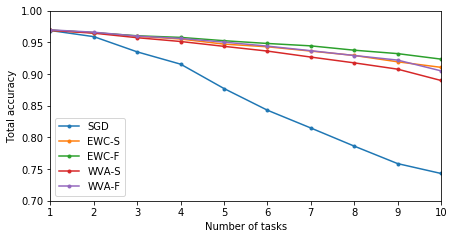

In [48]:
plt.figure(figsize = (7, 3.5))
plt.ylim(0.70, 1.)
plt.ylabel('Total accuracy')
plt.xlabel('Number of tasks')
plt.xlim(1, 10)
plt.plot(idxs, accs[0], label='SGD', marker=".")
plt.plot(idxs, accs[1], label='EWC-S', marker=".")
plt.plot(idxs, accs[2], label='EWC-F', marker=".")
plt.plot(idxs, accs[3], label='WVA-S', marker=".")
plt.plot(idxs, accs[4], label='WVA-F', marker=".")
plt.legend()
plt.show()

In [37]:
tf.__version__

'1.14.0'